In [1]:
# 산점도로 " 두 생선이 구분되는지" 먼저 보기
import matplotlib.pyplot as plt
# 맷플롯립 라이브러리 불러오기

# (예시) 도미 데이터 (길이/무게)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.7, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 38.5, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 450.0, 390.0, 475.0, 600.0, 700.0, 575.0, 725.0, 850.0, 955.0, 975.0]

# (예시) 빙어 데이터 (길이/무게)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 12.2, 13.4, 12.2, 19.7]

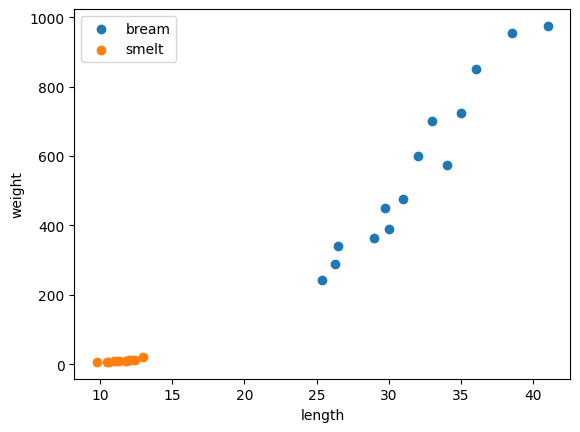

In [2]:
# 산점도 : 점으로 (길이, 무게) 관계를 시각화
plt.scatter(bream_length, bream_weight,label = "bream")
plt.scatter(smelt_length,smelt_weight,label = "smelt")

plt.xlabel("length")    # x축 : 길이
plt.ylabel("weight")    # y축 : 무게
plt.legend()
plt.show()

In [ ]:
# 모델 학습 전에 “특성 2개(길이/무게)로 분리가 가능한지” 눈으로 확인하는 단계

In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 1) 입력(X) 만들기: (길이, 무게) 2개 특성 -> 2차원 데이터로 묶기
# zip으로 (길이,무게) 쌍을 만들고 list로 변환하면 [[len, wt], ...] 형태가 됨
bream_data = list(zip(bream_length, bream_weight))
smelt_data = list(zip(smelt_length, smelt_weight))

# X: 입력 데이터(훈련 데이터) = 도미 + 빙어를 합친 것
X = np.array(bream_data + smelt_data)

# y: 정답(타깃)
# 도미=1, 빙어=0 같은 숫자로 라벨링(분류는 이렇게 “정답 라벨”이 필요)
y = np.array([1] * len(bream_data) + [0] * len(smelt_data))

# 2) 모델 생성: KNN 분류기
kn = KNeighborsClassifier(n_neighbors=5)  # 주변 이웃 5개로 다수결

# 3) 학습: 입력(X)와 정답(y)을 기억(=훈련)
kn.fit(X, y)

# 4) 예측: 새 생선(길이=30, 무게=600)은 도미일까?
new_fish = np.array([[30, 600]])
pred = kn.predict(new_fish)
print("예측 라벨:", pred[0])
if pred == 1: print("도미")
else: print("빙어")
# 1이면 도미, 0이면 빙어

예측 라벨: 1
도미


In [ ]:
# *왜 KNN을 쓰나?* 가장 직관적인 지도학습 분류 입문 모델이라서. “가까운 애들(이웃)이 누구냐”로 결정.

In [9]:
# train/test 분리 + 정확도(score) 확인

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# train/test 분리: 모델이 암기했는지(훈련만 잘함) vs 일반화했는지(새 데이터도 잘함) 확인
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,      # 25%는 테스트로
    random_state=42,     # 실행할 때마다 같은 분리(재현성)
    stratify=y           # 클래스 비율 유지(분류에서 권장)
)
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train) # 학습시작

print("훈련 정확도 :", kn.score(X_train, y_train))
print("테스트 정확도 :" ,kn.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 1.0


In [10]:
# n_neighbors 바꿔가며 과소/과대적합 감 잡기

for k in [1,3,5,10,15]:
    kn=KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train, y_train)
    print(f"k={k:2d} | train={kn.score(X_train,y_train):.3f} | test={kn.score(X_test,y_test):.3f}")

k= 1 | train=1.000 | test=1.000
k= 3 | train=1.000 | test=1.000
k= 5 | train=1.000 | test=1.000
k=10 | train=0.895 | test=1.000
k=15 | train=0.842 | test=0.857


In [ ]:
# train만 높고 test가 낮으면 → 과대적합(암기)
# 둘 다 낮으면 → 과소적합(학습 부족/모델 부적절)

In [12]:
# “외워야 하는” 클래스/메서드 (최소 세트)

# 클래스(설계도)
# KNeighborsClassifier : KNN 분류 모델
# train_test_split : 훈련/테스트 분리
# matplotlib.pyplot : 시각화(산점도)

# 메서드(기능)
# plt.scatter(x, y) : 산점도로 분포 보기
# model.fit(X, y) : 학습(입력-정답으로 모델 구성)
# model.predict(X_new) : 새 데이터 예측
# model.score(X, y) : 분류 정확도(accuracy)

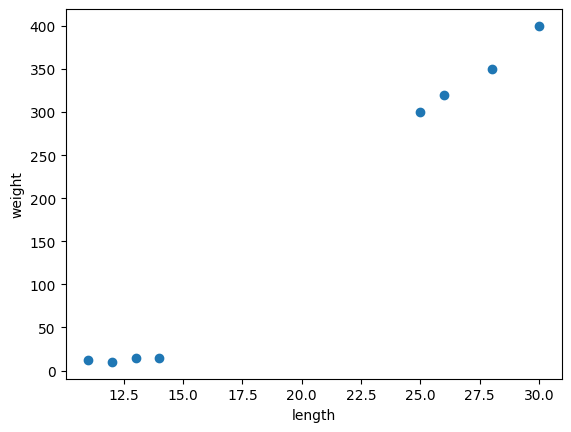

In [14]:
# MBC 마켓 머신러닝 실습 문제 세트
# [문제] 1. 산점도 해석 문제
# 아래 데이터를 산점도로 그려라.

length = [25, 26, 28, 30, 12, 11, 13, 14]
weight = [300, 320, 350, 400, 10, 12, 14, 15]

# 점들이 몇 개의 그룹으로 보이는가? 2개
# 길이만으로도 분류가 가능할 것 같은가? 네
# 무게만으로도 분류가 가능할 것 같은가? 네
# 👉 반드시 그래프 그려서 판단하기

import matplotlib.pyplot as plt
plt.scatter(length,weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [18]:
# [문제] 2. KNN 분류 직접 만들기
# 다음 데이터를 이용해 KNN 모델을 만들어라.

fish_data = [
    [25, 300],
    [26, 320],
    [28, 350],
    [30, 400],
    [12, 10],
    [11, 12],
    [13, 14],
    [14, 15]
]

fish_target = [1,1,1,1,0,0,0,0]

# 질문
# k=3일 때 [27, 340]은 무엇으로 분류되는가? 분류 1
# k=1로 바꾸면 결과가 달라지는가? 1로 동일하다
# 왜 그런가?

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(fish_data)

new_fish = np.array([[27,340]])

fish_scaled = scaler.transform(fish_data)
new_scaled = scaler.transform(new_fish)

kn3 = KNeighborsClassifier(n_neighbors=3)
kn3.fit(fish_scaled, fish_target)
print("k=3 예측:", kn3.predict(new_scaled))

kn1 = KNeighborsClassifier(n_neighbors=1)
kn1.fit(fish_scaled, fish_target)
print("k=1 예측:", kn1.predict(new_scaled))

k=3 예측: [1]
k=1 예측: [1]
